In [139]:
import re
import torchtext
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from tqdm.notebook import tqdm, trange
from torch.nn import Embedding
from torch.nn.functional import one_hot
import numpy as np
import itertools
import pickle
from sklearn import preprocessing
from matplotlib import pyplot as plt
from multiprocessing import Pool
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score, roc_curve

In [2]:
a = pd.read_csv("nature_10.csv", sep='\t', names=['name', "journal", "issn", "doi", "volume", "issue", "year", "pages", "author(s)", "affiliations", "abstract", "references", "email"], header=None)

In [3]:
a

,name,journal,issn,doi,volume,issue,year,pages,author(s),affiliations,abstract,references,email
0,Chromatin remodeling regulated by steroid and ...,Cell Research,1748-7838,10.1038/cr.1997.14,7.0,2.0,1997.0,127-142,"Wolffe, Alan P","Wolffe, Alan P#:#Laboratory of Molecular Embro...",Coactivators and corepressors regulate transcr...,citation_journal_title=Ann Rev Genet; citation...,NaN
1,Biochemical detection of alien DNA incorporate...,Heredity,1365-2540,10.1038/hdy.1978.49,40.0,3.0,1978.0,439-455,"Flavell, Richard;O'Dell, Michael;Rimpau, Jürge...","Flavell, Richard#:#Department of Cytogenetics,...",Wheat lines carrying homologous pairs of compl...,"Barber, H N, Driscoll, C J, and Vickery, R S. ...",NaN
2,Early Archaean Age for the Isua Iron Formation...,Nature,1476-4687,10.1038/245138a0,245.0,5421.0,1973.0,138-139,"MOORBATH, S.;O'NIONS, R. K.;PANKHURST, R. J.","MOORBATH, S.#:#Department of Geology, Universi...","SOME 150 km north-east of Godthaab, on the edg...",citation_journal_title=Nature; citation_author...,NaN
3,Technical Education Abstracts,Nature,1476-4687,10.1038/193222a0,193.0,4812.0,1962.0,222-222,NaN,NaN,NaN,NaN,NaN
4,The Utility of Specific Characters,Nature,1476-4687,10.1038/054365b0,54.0,1399.0,1896.0,365-366,"LANKESTER, E. RAY","LANKESTER, E. RAY#:#Dinard, Bretagne",I REGRET very much that I did not correctly re...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,"3,3-Difluoroallyl ammonium salts: highly versa...",Nature Communications,2041-1723,10.1038/s41467-021-23504-2,12.0,1.0,2021.0,1-9,"Ye, Fei;Ge, Yao;Spannenberg, Anke;Neumann, Hel...","Ye, Fei#:#Key Laboratory of Organosilicon Chem...",The selective synthesis of fluorinated organic...,citation_journal_title=Chem. Soc. Rev.; citati...,Matthias Beller#:#matthias.beller@catalysis.de
9996,Swedish Physics Conference of September 1952,Nature,1476-4687,10.1038/174863c0,174.0,4436.0,1954.0,863-863,NaN,NaN,NaN,NaN,NaN
9997,Apc modulates embryonic stem-cell differentiat...,Nature Genetics,1546-1718,10.1038/ng1045,32.0,4.0,2002.0,594-605,"Kielman, Menno F.;Rindapää, Maaret;Gaspar, Cla...","Kielman, Menno F.#:#Center for Human and Clini...",The Wnt signal-transduction pathway induces th...,citation_journal_title=Genes Dev.; citation_ti...,Riccardo Fodde#:#r.fodde@lumc.nl
9998,PCH1 and PCHL promote photomorphogenesis in pl...,Nature Communications,2041-1723,10.1038/s41467-017-02311-8,8.0,1.0,2017.0,1-9,"Enderle, Beatrix;Sheerin, David J.;Paik, Inyup...","Enderle, Beatrix#:#Faculty of Biology, Institu...",Phytochrome B (phyB) is the primary red light ...,citation_journal_title=Annu. Rev. Plant. Biol....,Andreas Hiltbrunner#:#andreas.hiltbrunner@biol...


In [4]:
a = a.drop(labels=['issn','volume', 'issue', 'year', 'pages', 'author(s)', 'affiliations', 'abstract' ,'email'], axis=1)

In [5]:
a

,name,journal,doi,references
0,Chromatin remodeling regulated by steroid and ...,Cell Research,10.1038/cr.1997.14,citation_journal_title=Ann Rev Genet; citation...
1,Biochemical detection of alien DNA incorporate...,Heredity,10.1038/hdy.1978.49,"Barber, H N, Driscoll, C J, and Vickery, R S. ..."
2,Early Archaean Age for the Isua Iron Formation...,Nature,10.1038/245138a0,citation_journal_title=Nature; citation_author...
3,Technical Education Abstracts,Nature,10.1038/193222a0,NaN
4,The Utility of Specific Characters,Nature,10.1038/054365b0,NaN
...,...,...,...,...
9995,"3,3-Difluoroallyl ammonium salts: highly versa...",Nature Communications,10.1038/s41467-021-23504-2,citation_journal_title=Chem. Soc. Rev.; citati...
9996,Swedish Physics Conference of September 1952,Nature,10.1038/174863c0,NaN
9997,Apc modulates embryonic stem-cell differentiat...,Nature Genetics,10.1038/ng1045,citation_journal_title=Genes Dev.; citation_ti...
9998,PCH1 and PCHL promote photomorphogenesis in pl...,Nature Communications,10.1038/s41467-017-02311-8,citation_journal_title=Annu. Rev. Plant. Biol....


In [6]:
p = re.compile("citation_doi=.+;|$")

In [7]:
b = a.dropna(subset=['references'])

In [8]:
a['references'] = a['references'].fillna('')

In [9]:
a['references'] = a['references'].str.split('#;#').map(lambda x: list(filter(lambda z: z!="", list(map(lambda y: re.findall(p, y)[0], x)))))[a['references'].apply(len)>0]
b['references'] = b['references'].str.split('#;#').map(lambda x: list(filter(lambda z: z!="", list(map(lambda y: re.findall(p, y)[0], x)))))[b['references'].apply(len)>0]


/tmp/.private/exe/ipykernel_9146/486250263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['references'] = b['references'].str.split('#;#').map(lambda x: list(filter(lambda z: z!="", list(map(lambda y: re.findall(p, y)[0], x)))))[b['references'].apply(len)>0]


In [10]:
a

,name,journal,doi,references
0,Chromatin remodeling regulated by steroid and ...,Cell Research,10.1038/cr.1997.14,[citation_doi=10.1146/annurev.ge.11.120177.001...
1,Biochemical detection of alien DNA incorporate...,Heredity,10.1038/hdy.1978.49,"[citation_doi=10.1139/g75-013;, citation_doi=1..."
2,Early Archaean Age for the Isua Iron Formation...,Nature,10.1038/245138a0,"[citation_doi=10.1098/rsta.1973.0014;, citatio..."
3,Technical Education Abstracts,Nature,10.1038/193222a0,NaN
4,The Utility of Specific Characters,Nature,10.1038/054365b0,NaN
...,...,...,...,...
9995,"3,3-Difluoroallyl ammonium salts: highly versa...",Nature Communications,10.1038/s41467-021-23504-2,"[citation_doi=10.1039/b610738a;, citation_doi=..."
9996,Swedish Physics Conference of September 1952,Nature,10.1038/174863c0,NaN
9997,Apc modulates embryonic stem-cell differentiat...,Nature Genetics,10.1038/ng1045,"[citation_doi=10.1101/gad.11.24.3286;, citatio..."
9998,PCH1 and PCHL promote photomorphogenesis in pl...,Nature Communications,10.1038/s41467-017-02311-8,[citation_doi=10.1146/annurev-arplant-050312-1...


In [11]:
b

,name,journal,doi,references
0,Chromatin remodeling regulated by steroid and ...,Cell Research,10.1038/cr.1997.14,[citation_doi=10.1146/annurev.ge.11.120177.001...
1,Biochemical detection of alien DNA incorporate...,Heredity,10.1038/hdy.1978.49,"[citation_doi=10.1139/g75-013;, citation_doi=1..."
2,Early Archaean Age for the Isua Iron Formation...,Nature,10.1038/245138a0,"[citation_doi=10.1098/rsta.1973.0014;, citatio..."
6,Placental Restriction Alters the Functional De...,Pediatric Research,10.1203/00006450-199612000-00014,"[citation_doi=10.1210/edrv-10-2-182;, citation..."
7,Deducing the coefficient of relationship by th...,Heredity,10.1038/hdy.1993.72,"[citation_doi=10.1080/00218839.1987.11100731;,..."
...,...,...,...,...
9993,South Asian agriculture increasingly dependent...,Nature Climate Change,10.1038/s41558-022-01355-z,[]
9995,"3,3-Difluoroallyl ammonium salts: highly versa...",Nature Communications,10.1038/s41467-021-23504-2,"[citation_doi=10.1039/b610738a;, citation_doi=..."
9997,Apc modulates embryonic stem-cell differentiat...,Nature Genetics,10.1038/ng1045,"[citation_doi=10.1101/gad.11.24.3286;, citatio..."
9998,PCH1 and PCHL promote photomorphogenesis in pl...,Nature Communications,10.1038/s41467-017-02311-8,[citation_doi=10.1146/annurev-arplant-050312-1...


In [12]:
b = b.dropna(subset=['references'])[b['references'].dropna().apply(len)!=0]

In [13]:
b

,name,journal,doi,references
0,Chromatin remodeling regulated by steroid and ...,Cell Research,10.1038/cr.1997.14,[citation_doi=10.1146/annurev.ge.11.120177.001...
1,Biochemical detection of alien DNA incorporate...,Heredity,10.1038/hdy.1978.49,"[citation_doi=10.1139/g75-013;, citation_doi=1..."
2,Early Archaean Age for the Isua Iron Formation...,Nature,10.1038/245138a0,"[citation_doi=10.1098/rsta.1973.0014;, citatio..."
6,Placental Restriction Alters the Functional De...,Pediatric Research,10.1203/00006450-199612000-00014,"[citation_doi=10.1210/edrv-10-2-182;, citation..."
7,Deducing the coefficient of relationship by th...,Heredity,10.1038/hdy.1993.72,"[citation_doi=10.1080/00218839.1987.11100731;,..."
...,...,...,...,...
9992,Cross-Over Concentration in Polydisperse Polym...,Polymer Journal,10.1295/polymj.19.1279,[citation_doi=10.1021/ma50004a042;]
9995,"3,3-Difluoroallyl ammonium salts: highly versa...",Nature Communications,10.1038/s41467-021-23504-2,"[citation_doi=10.1039/b610738a;, citation_doi=..."
9997,Apc modulates embryonic stem-cell differentiat...,Nature Genetics,10.1038/ng1045,"[citation_doi=10.1101/gad.11.24.3286;, citatio..."
9998,PCH1 and PCHL promote photomorphogenesis in pl...,Nature Communications,10.1038/s41467-017-02311-8,[citation_doi=10.1146/annurev-arplant-050312-1...


In [14]:
a['references'] = a['references'].fillna('')

In [15]:
a['references'] = a['references'].map(lambda x: list(map(lambda y: y.replace(";", "").split("=")[1], x)))
b['references'] = b['references'].map(lambda x: list(map(lambda y: y.replace(";", "").split("=")[1], x)))

In [16]:
a

,name,journal,doi,references
0,Chromatin remodeling regulated by steroid and ...,Cell Research,10.1038/cr.1997.14,"[10.1146/annurev.ge.11.120177.001323, 10.1021/..."
1,Biochemical detection of alien DNA incorporate...,Heredity,10.1038/hdy.1978.49,"[10.1139/g75-013, 10.1098/rstb.1976.0044, 10.1..."
2,Early Archaean Age for the Isua Iron Formation...,Nature,10.1038/245138a0,"[10.1098/rsta.1973.0014, 10.1016/0016-7037(70)..."
3,Technical Education Abstracts,Nature,10.1038/193222a0,[]
4,The Utility of Specific Characters,Nature,10.1038/054365b0,[]
...,...,...,...,...
9995,"3,3-Difluoroallyl ammonium salts: highly versa...",Nature Communications,10.1038/s41467-021-23504-2,"[10.1039/b610738a, 10.1126/science.1131943, 10..."
9996,Swedish Physics Conference of September 1952,Nature,10.1038/174863c0,[]
9997,Apc modulates embryonic stem-cell differentiat...,Nature Genetics,10.1038/ng1045,"[10.1101/gad.11.24.3286, 10.1016/S0167-4889(99..."
9998,PCH1 and PCHL promote photomorphogenesis in pl...,Nature Communications,10.1038/s41467-017-02311-8,"[10.1146/annurev-arplant-050312-120221, 10.119..."


In [17]:
b

,name,journal,doi,references
0,Chromatin remodeling regulated by steroid and ...,Cell Research,10.1038/cr.1997.14,"[10.1146/annurev.ge.11.120177.001323, 10.1021/..."
1,Biochemical detection of alien DNA incorporate...,Heredity,10.1038/hdy.1978.49,"[10.1139/g75-013, 10.1098/rstb.1976.0044, 10.1..."
2,Early Archaean Age for the Isua Iron Formation...,Nature,10.1038/245138a0,"[10.1098/rsta.1973.0014, 10.1016/0016-7037(70)..."
6,Placental Restriction Alters the Functional De...,Pediatric Research,10.1203/00006450-199612000-00014,"[10.1210/edrv-10-2-182, 10.1677/joe.0.1470139,..."
7,Deducing the coefficient of relationship by th...,Heredity,10.1038/hdy.1993.72,"[10.1080/00218839.1987.11100731, 10.1080/00015..."
...,...,...,...,...
9992,Cross-Over Concentration in Polydisperse Polym...,Polymer Journal,10.1295/polymj.19.1279,[10.1021/ma50004a042]
9995,"3,3-Difluoroallyl ammonium salts: highly versa...",Nature Communications,10.1038/s41467-021-23504-2,"[10.1039/b610738a, 10.1126/science.1131943, 10..."
9997,Apc modulates embryonic stem-cell differentiat...,Nature Genetics,10.1038/ng1045,"[10.1101/gad.11.24.3286, 10.1016/S0167-4889(99..."
9998,PCH1 and PCHL promote photomorphogenesis in pl...,Nature Communications,10.1038/s41467-017-02311-8,"[10.1146/annurev-arplant-050312-120221, 10.119..."


In [18]:
le = preprocessing.LabelEncoder()

In [19]:
voc = list(itertools.chain.from_iterable(list(a['references'])))

In [20]:
voc += list(a['doi'])
voc.append('')
voc

['10.1146/annurev.ge.11.120177.001323',
 '10.1021/bi00560a004',
 '10.1016/S0021-9258(19)68221-9',
 '10.1021/bi00270a004',
 '10.1021/bi00271a012',
 '10.1016/S0021-9258(19)77625-X',
 '10.1093/emboj/16.23.7130',
 '10.1016/0092-8674(83)90335-5',
 '10.1093/nar/16.20.9663',
 '10.1126/science.2830672',
 '10.1002/j.1460-2075.1993.tb05674.x',
 '10.1101/gad.9.24.3051',
 '10.1093/nar/11.4.1151',
 '10.1111/j.1432-1033.1983.tb07162.x',
 '10.1073/pnas.85.19.7119',
 '10.1093/nar/20.17.4525',
 '10.1073/pnas.88.8.3125',
 '10.1126/science.8248805',
 '10.1042/bj2940557',
 '10.1016/S0021-9258(18)55252-2',
 '10.1074/jbc.272.17.11526',
 '10.1093/nar/22.10.1815',
 '10.1073/pnas.93.21.11540',
 '10.1016/0092-8674(84)90523-3',
 '10.1126/science.8178167',
 '10.1016/0968-0004(94)90148-1',
 '10.1126/science.1347958',
 '10.1016/S0022-2836(99)80015-1',
 '10.1002/j.1460-2075.1988.tb03172.x',
 '10.1002/j.1460-2075.1987.tb02507.x',
 '10.1101/gad.9.15.1933',
 '10.1021/bi00038a046',
 '10.1002/j.1460-2075.1992.tb05365.x',

In [21]:
len(set(voc))

199292

In [22]:
le.fit(voc)

LabelEncoder()

In [23]:
le.transform([''])

array([0])

In [24]:
a['doi'] = le.transform(a['doi'])

In [25]:
with Pool(8) as p:
    a['references'] = list(p.map(le.transform, a['references']))

In [26]:
a['references']

0       [161462, 61997, 26199, 61922, 61924, 26204, 12...
1       [160172, 134980, 70007, 27537, 21489, 25486, 1...
2                          [134923, 21233, 20798, 134921]
3                                                      []
4                                                      []
                              ...                        
9995    [103373, 151712, 102319, 103392, 62819, 62820,...
9996                                                   []
9997    [135758, 29628, 27925, 72504, 33212, 153060, 3...
9998    [160635, 175610, 27366, 83199, 87931, 105197, ...
9999                                              [13108]
Name: references, Length: 10000, dtype: object

In [27]:
a['journal'] = le.fit_transform(a['journal'])

In [28]:
max(a['journal'])

167

In [29]:
nothing = max(list(itertools.chain.from_iterable(list(a['references'])))) + 1

In [30]:
def vectorize(smth):
    if len(smth) < max(a['references'].map(len)):
        smth = torch.cat((torch.tensor(smth, dtype=torch.float), torch.zeros(max(a['references'].map(len)) - len(smth), dtype=torch.float) + nothing))
    else:
        smth = torch.tensor(smth, dtype=torch.float)
    return smth

In [31]:
a['references'] = a['references'].map(vectorize)

In [32]:
a

,name,journal,doi,references
0,Chromatin remodeling regulated by steroid and ...,17,75172,"[tensor(161462.), tensor(61997.), tensor(26199..."
1,Biochemical detection of alien DNA incorporate...,32,76064,"[tensor(160172.), tensor(134980.), tensor(7000..."
2,Early Archaean Age for the Isua Iron Formation...,54,70478,"[tensor(134923.), tensor(21233.), tensor(20798..."
3,Technical Education Abstracts,54,69608,"[tensor(199292.), tensor(199292.), tensor(1992..."
4,The Utility of Specific Characters,54,68471,"[tensor(199292.), tensor(199292.), tensor(1992..."
...,...,...,...,...
9995,"3,3-Difluoroallyl ammonium salts: highly versa...",75,93476,"[tensor(103373.), tensor(151712.), tensor(1023..."
9996,Swedish Physics Conference of September 1952,54,69124,"[tensor(199292.), tensor(199292.), tensor(1992..."
9997,Apc modulates embryonic stem-cell differentiat...,81,84221,"[tensor(135758.), tensor(29628.), tensor(27925..."
9998,PCH1 and PCHL promote photomorphogenesis in pl...,75,92723,"[tensor(160635.), tensor(175610.), tensor(2736..."


In [221]:
X_train, X_test, y_train, y_test = train_test_split(
    a['references'].reset_index(drop=True), a['journal'].reset_index(drop=True),
    test_size=0.2, random_state=1)

In [222]:
class JournalDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.y = Y
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [223]:
train_dataset = JournalDataset(X_train.values, y_train.values)
test_dataset = JournalDataset(X_test.values, y_test.values)

In [224]:
train_loader = DataLoader(train_dataset, batch_size=128, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=128, drop_last=True)

In [239]:
model = nn.Sequential(nn.Linear(349, 1000), 
                      nn.Sigmoid(),
                      #nn.ReLU(),
                      nn.Linear(1000, 168))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [244]:
%%time
losses = []
accuracies = []
precisions = []
recalls = []
fs = []
n_epochs = 100
for epoch in range(n_epochs):
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        predictions = model(X_batch)
        loss = criterion(predictions, y_batch.type(torch.long))
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        epoch_loss += loss.item()
    with torch.no_grad():
        val_loss, val_acc, val_prec, val_rec, val_f = 0, 0, 0, 0, 0
        for X_batch, y_batch in test_loader:
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch.type(torch.long)).item()
            acc = accuracy_score(y_batch, predictions.argmax(dim=1).cpu().detach()).item()
            prec = precision_score(y_batch, predictions.argmax(dim=1).cpu().detach(), average='micro')
            rec = recall_score(y_batch, predictions.argmax(dim=1).cpu().detach(), average='micro')
            f1 = f1_score(y_batch, predictions.argmax(dim=1).cpu().detach(), average='micro')
            val_f +=f1
            val_loss += loss
            val_acc += acc
            val_prec += prec
            val_rec += rec
        precisions.append(val_prec/10)
        losses.append(val_loss/10)
        accuracies.append(val_acc/10)
        recalls.append(val_rec/10)
        fs.append(val_f/10)

CPU times: user 1min 53s, sys: 424 ms, total: 1min 54s
Wall time: 19.1 s


In [146]:
predictions.argmax(dim=1)

tensor([ 54, 135, 135, 135, 135, 135, 135,  54, 135,  54,  54,  54,  54, 135,
         54,  75, 135,  54,  54,  54,  54, 135,  54,  54, 135, 135,  54, 135,
         54, 135,  54, 135, 135,  54,  54, 135,  54,  54, 135,  54,  54, 135,
         54,  54,  54,  54,  54,  54,  54,  54,  54,  54,  54, 135, 135,  54,
         54, 135, 135, 135,  54,  54,  54,  54, 135, 135,  54,  54,  54, 135,
         54, 135,  54,  54, 135,  54,  54,  54,  54,  54, 135,  54, 135,  54,
         54, 135, 135,  54,  54,  54,  54,  54, 135,  54,  54,  54,  54,  54,
         54, 135,  54,  54,  54, 135,  54, 135, 135, 135,  54,  54,  54,  54,
         54,  54, 135,  54,  54,  54,  54,  54,  54, 135,  54,  54,  54,  54,
         54,  54])

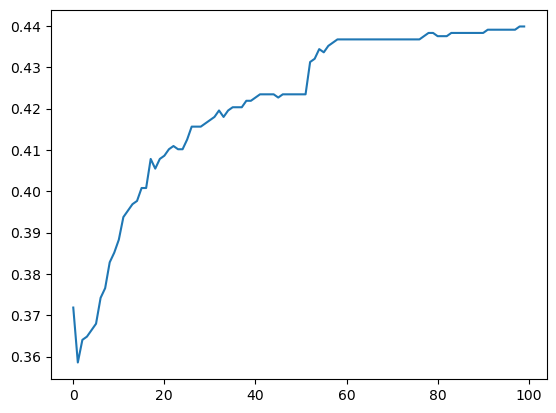

In [241]:
plt.plot(list(range(100)),accuracies)
plt.show()

In [159]:
accuracies

[0.35625,
 0.359375,
 0.36796875,
 0.375,
 0.3875,
 0.390625,
 0.4015625,
 0.40546875,
 0.4109375,
 0.42109375,
 0.421875,
 0.421875,
 0.425,
 0.4265625,
 0.428125,
 0.43046875,
 0.4296875,
 0.4296875,
 0.43359375,
 0.4375,
 0.4390625,
 0.4390625,
 0.43984375,
 0.43984375,
 0.440625,
 0.4390625,
 0.4390625,
 0.43984375,
 0.440625,
 0.44140625,
 0.440625,
 0.44296875,
 0.4421875,
 0.44296875,
 0.4421875,
 0.4421875,
 0.44140625,
 0.43984375,
 0.4328125,
 0.434375,
 0.43359375,
 0.43515625,
 0.43984375,
 0.440625,
 0.44140625,
 0.44140625,
 0.44140625,
 0.4421875,
 0.4421875,
 0.44296875,
 0.453125,
 0.44140625,
 0.4421875,
 0.44375,
 0.44453125,
 0.4453125,
 0.4453125,
 0.4453125,
 0.446875,
 0.446875,
 0.44765625,
 0.44765625,
 0.44765625,
 0.44765625,
 0.44765625,
 0.44765625,
 0.44765625,
 0.44765625,
 0.446875,
 0.446875,
 0.44765625,
 0.44765625,
 0.44765625,
 0.44765625,
 0.44765625,
 0.4484375,
 0.4484375,
 0.44921875,
 0.4484375,
 0.4484375,
 0.4484375,
 0.4484375,
 0.44921875,


In [236]:
accuracies[-1]

0.3546875

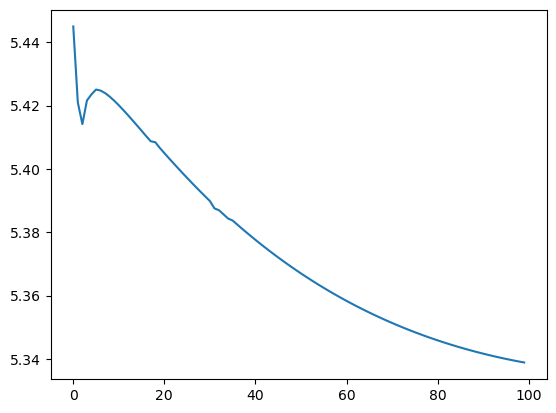

In [242]:
plt.plot(list(range(100)),losses)
plt.show()

In [238]:
losses[-1]

6.138336157798767

In [161]:
precisions

[0.35625,
 0.359375,
 0.36796875,
 0.375,
 0.3875,
 0.390625,
 0.4015625,
 0.40546875,
 0.4109375,
 0.42109375,
 0.421875,
 0.421875,
 0.425,
 0.4265625,
 0.428125,
 0.43046875,
 0.4296875,
 0.4296875,
 0.43359375,
 0.4375,
 0.4390625,
 0.4390625,
 0.43984375,
 0.43984375,
 0.440625,
 0.4390625,
 0.4390625,
 0.43984375,
 0.440625,
 0.44140625,
 0.440625,
 0.44296875,
 0.4421875,
 0.44296875,
 0.4421875,
 0.4421875,
 0.44140625,
 0.43984375,
 0.4328125,
 0.434375,
 0.43359375,
 0.43515625,
 0.43984375,
 0.440625,
 0.44140625,
 0.44140625,
 0.44140625,
 0.4421875,
 0.4421875,
 0.44296875,
 0.453125,
 0.44140625,
 0.4421875,
 0.44375,
 0.44453125,
 0.4453125,
 0.4453125,
 0.4453125,
 0.446875,
 0.446875,
 0.44765625,
 0.44765625,
 0.44765625,
 0.44765625,
 0.44765625,
 0.44765625,
 0.44765625,
 0.44765625,
 0.446875,
 0.446875,
 0.44765625,
 0.44765625,
 0.44765625,
 0.44765625,
 0.44765625,
 0.4484375,
 0.4484375,
 0.44921875,
 0.4484375,
 0.4484375,
 0.4484375,
 0.4484375,
 0.44921875,


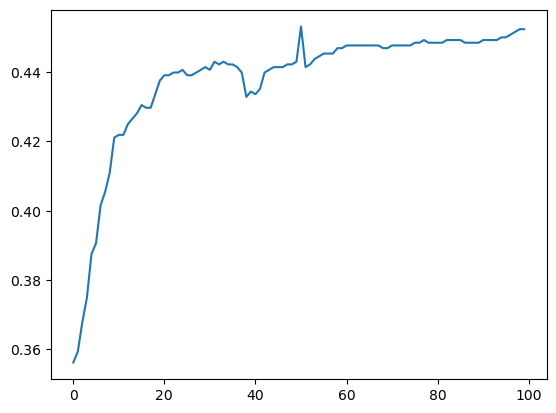

In [162]:
plt.plot(list(range(100)),precisions)
plt.show()

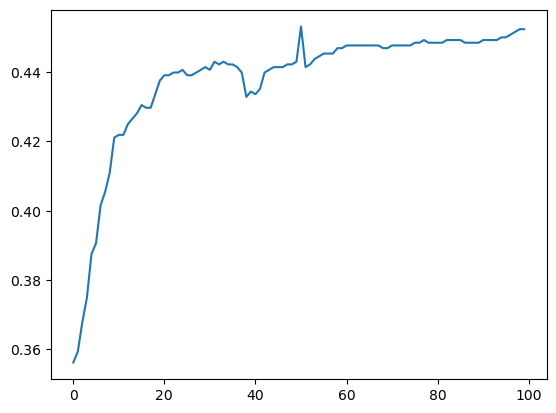

In [163]:
plt.plot(list(range(100)),recalls)
plt.show()

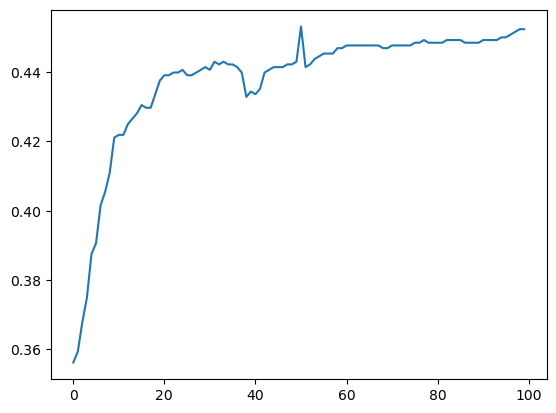

In [164]:
plt.plot(list(range(100)),fs)


In [165]:
losses[-1]

5.350745773315429

In [177]:
class ConvNet(nn.Module): 
    def __init__(self): 
        super(ConvNet, self).__init__() 
        self.layer1 = nn.Sequential( nn.Conv1d(128, 128, kernel_size=5, stride=1, padding=2), 
        nn.Sigmoid(), nn.MaxPool1d(kernel_size=2, stride=2)) 
        self.layer2 = nn.Sequential( nn.Conv1d(128, 128, kernel_size=5, stride=1, padding=2), 
        nn.Sigmoid(), nn.MaxPool1d(kernel_size=2, stride=2)) 
        self.drop_out = nn.Dropout() 
        self.fc1 = nn.Linear(87, 1000) 
        self.fc2 = nn.Linear(1000, 168)
    def forward(self, x): 
        out = self.layer1(x) 
        out = self.layer2(out) 
        #out = out.reshape(out.size(0), -1) 
        out = self.drop_out(out) 
        out = self.fc1(out) 
        out = self.fc2(out) 
        return out

In [192]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [193]:
%%time
model = ConvNet()
losses = []
accuracies = []
precisions = []
recalls = []
fs = []
n_epochs = 100
for epoch in range(n_epochs):
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        predictions = model(X_batch)
        loss = criterion(predictions, y_batch.type(torch.long))
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        epoch_loss += loss.item()
    with torch.no_grad():
        val_loss, val_acc, val_prec, val_rec, val_f = 0, 0, 0, 0, 0
        for X_batch, y_batch in test_loader:
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch.type(torch.long)).item()
            acc = accuracy_score(y_batch, predictions.argmax(dim=1).cpu().detach()).item()
            prec = precision_score(y_batch, predictions.argmax(dim=1).cpu().detach(), average='micro')
            rec = recall_score(y_batch, predictions.argmax(dim=1).cpu().detach(), average='micro')
            f1 = f1_score(y_batch, predictions.argmax(dim=1).cpu().detach(), average='micro')
            val_f +=f1
            val_loss += loss
            val_acc += acc
            val_prec += prec
            val_rec += rec
        precisions.append(val_prec/10)
        losses.append(val_loss/10)
        accuracies.append(val_acc/10)
        recalls.append(val_rec/10)
        fs.append(val_f/10)

CPU times: user 2min 1s, sys: 436 ms, total: 2min 1s
Wall time: 20.3 s


In [107]:
y_batch

tensor([130,  75, 156,  63,  20, 135,  42,  54,  94,  86,  10,  11,  29,  43,
        127, 101, 135, 120,  54,  54,  89,  75,  54,  55,  11,  75,  11,  81,
         54, 135,  59, 135,   0,  47,  54, 135, 130,  59,  81,  75, 130,  42,
        130,  47,  54,  65,  54,  26,  54, 135,  10,  54,  54,   0, 135,  54,
         54,  75,  11,  83,  54,  85,  54,   5, 155,  36,  10,  29,  59,  54,
         54,  13,  54,  89,  75,  54, 135,  26, 131,  54, 127,  10,  11,  54,
         11,  67, 135,  54,  65,  10,  54,  54,  11,  11, 135,  54,  46,  32,
         54,  94,  54,  54,  54,  54,  96, 135,  75,  47,  28,  54,  11,  54,
        112,  46, 134, 130,  54,  44,   9,  32,  10,  13, 104, 131,  54,  89,
        127, 130])

In [180]:
predictions.argmax(dim=1)

tensor([143, 125,  13, 126, 125, 123,  39, 118, 126, 132, 115,  18,   9, 126,
         14, 101, 113,  39, 165, 145,  67,  66, 126, 145, 126,  14, 132,   8,
        126, 125, 145, 126,  15,  39,   9, 132, 125,  34,  34,  15,  66, 149,
        132, 117,  64, 132,  18, 132, 101,  39, 126, 131, 126, 149,  47,  39,
         14,  18, 132,  60,  88, 125, 132, 126,   9,  39, 132, 145, 132, 126,
         15,  41,   9, 132, 135,   9, 121,   9,  67,   9,  60, 126, 132,  66,
        125, 165,  81,  39,   9,  67, 132, 126,   9, 145,  88, 132,   9, 148,
        132, 165,  18, 126, 126,  66, 165, 122,  85, 132,  60, 125, 126,  18,
          9,  15,   9, 125,  60, 109,  18,   9, 126,  15,   9,  76, 132,   9,
        126, 132])

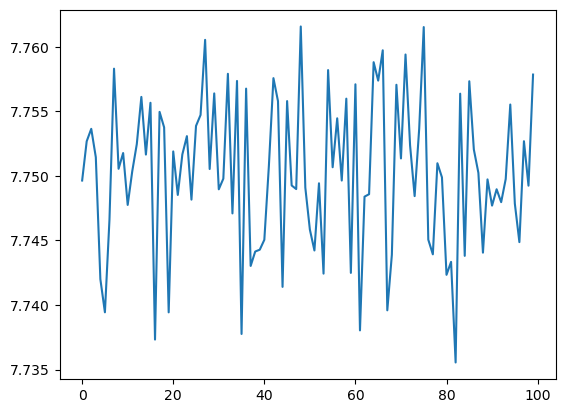

In [194]:
plt.plot(list(range(100)), losses)

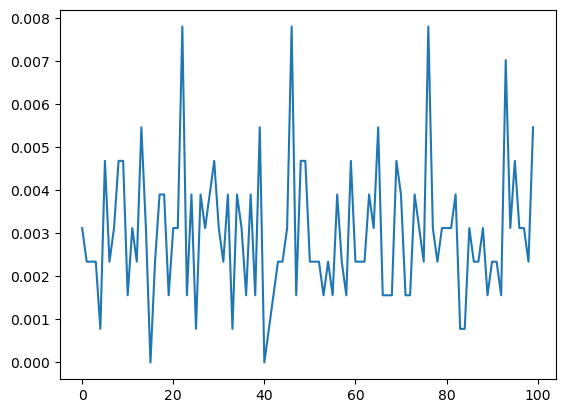

In [195]:
plt.plot(list(range(100)), accuracies)

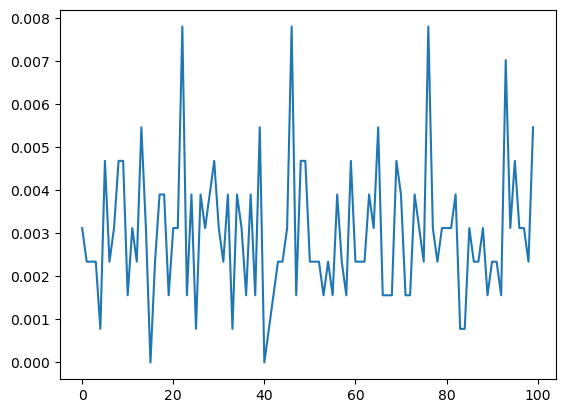

In [196]:
plt.plot(list(range(100)), precisions)

In [197]:
losses[-1]

7.757840204238891

In [198]:
X_train, X_test, y_train, y_test = train_test_split(
    a['references'].reset_index(drop=True), nn.functional.one_hot(torch.tensor(np.array(a['journal'].reset_index(drop=True)), dtype=torch.int64)),
    test_size=0.2, random_state=1)

In [199]:
emb = nn.Embedding(len(set(voc))+1, 128)

In [200]:
embedded = a['references'].map(lambda x: emb(x.to(dtype=torch.int64)))

In [201]:
embedded[0].shape

torch.Size([349, 128])

In [202]:
class Dataset2d(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.y = Y
        self.emb = nn.Embedding(len(set(voc))+1, 168)
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.emb(self.X[idx].to(dtype=torch.int64)), self.y[idx]

In [203]:
train_dataset2d = Dataset2d(X_train.values, y_train)
test_dataset2d = Dataset2d(X_test.values, y_test)

In [204]:
train_loader2d = DataLoader(train_dataset2d, batch_size=128, drop_last=True)
test_loader2d = DataLoader(test_dataset2d, batch_size=128, drop_last=True)

In [205]:
class ConvNet2d(nn.Module): 
    def __init__(self): 
        super(ConvNet2d, self).__init__() 
        self.layer1 = nn.Sequential( nn.Conv2d(128, 128, kernel_size=5, stride=1, padding=2), 
        nn.Sigmoid(), nn.MaxPool2d(kernel_size=2, stride=2)) 
        self.layer2 = nn.Sequential( nn.Conv2d(128, 128, kernel_size=5, stride=1, padding=2), 
        nn.Sigmoid(), nn.MaxPool2d(kernel_size=2, stride=2)) 
        self.drop_out = nn.Dropout() 
        self.fc1 = nn.Linear(42, 1000) 
        self.fc2 = nn.Linear(1000, 168)
    def forward(self, x): 
        out = self.layer1(x) 
        out = self.layer2(out) 
        out = self.drop_out(out) 
        out = self.fc1(out) 
        out = self.fc2(out) 
        return out

In [215]:
%%time
model2d = ConvNet2d()
losses = []
accuracies = []
precisions = []
recalls = []
fs = []
n_epochs = 100
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2d.parameters(), lr=0.001)
for epoch in range(n_epochs):
    epoch_loss = 0
    for X_batch, y_batch in train_loader2d:
        predictions = model(X_batch)
        loss = criterion(predictions, y_batch.type(torch.long))
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        epoch_loss += loss.item()
    with torch.no_grad():
        val_loss, val_acc, val_prec, val_rec, val_f = 0, 0, 0, 0, 0
        for X_batch, y_batch in test_loader2d:
            predictions = model2d(X_batch)
            loss = criterion(predictions, y_batch.type(torch.long)).item()
            acc = accuracy_score(y_batch.argmax(dim=1), predictions.argmax(dim=2).argmax(dim=1).cpu().detach()).item()
            prec = precision_score(y_batch.argmax(dim=1), predictions.argmax(dim=2).argmax(dim=1).cpu().detach(), average='micro')
            rec = recall_score(y_batch.argmax(dim=1), predictions.argmax(dim=2).argmax(dim=1).cpu().detach(), average='micro')
            f1 = f1_score(y_batch.argmax(dim=1), predictions.argmax(dim=2).argmax(dim=1).cpu().detach(), average='micro')
            val_f +=f1
            val_loss += loss
            val_acc += acc
            val_prec += prec
            val_rec += rec
        precisions.append(val_prec/10)
        losses.append(val_loss/10)
        accuracies.append(val_acc/10)
        recalls.append(val_rec/10)
        fs.append(val_f/10)

CPU times: user 1d 2h 43min 8s, sys: 11h 26min 17s, total: 1d 14h 9min 25s
Wall time: 6h 23min 38s


In [216]:
accuracies

[0.0125,
 0.01328125,
 0.0078125,
 0.009375,
 0.0125,
 0.01015625,
 0.00546875,
 0.0109375,
 0.00859375,
 0.01015625,
 0.01328125,
 0.00703125,
 0.01015625,
 0.01953125,
 0.00546875,
 0.01015625,
 0.00703125,
 0.009375,
 0.0109375,
 0.01015625,
 0.009375,
 0.0125,
 0.0078125,
 0.00625,
 0.009375,
 0.0078125,
 0.0046875,
 0.01171875,
 0.01015625,
 0.0125,
 0.0078125,
 0.009375,
 0.009375,
 0.009375,
 0.0109375,
 0.00859375,
 0.01171875,
 0.0125,
 0.009375,
 0.01015625,
 0.00859375,
 0.01328125,
 0.00859375,
 0.009375,
 0.0125,
 0.00859375,
 0.00859375,
 0.01015625,
 0.0078125,
 0.0046875,
 0.01171875,
 0.01328125,
 0.0046875,
 0.01015625,
 0.01015625,
 0.00625,
 0.01015625,
 0.0109375,
 0.0078125,
 0.01328125,
 0.009375,
 0.0125,
 0.01015625,
 0.0109375,
 0.01328125,
 0.009375,
 0.01328125,
 0.00546875,
 0.0109375,
 0.009375,
 0.0078125,
 0.0078125,
 0.01171875,
 0.0140625,
 0.0125,
 0.01484375,
 0.0109375,
 0.009375,
 0.01171875,
 0.0125,
 0.00859375,
 0.01484375,
 0.00703125,
 0.00859

In [217]:
losses

[6.720128440856934,
 6.720048522949218,
 6.720060348510742,
 6.719313621520996,
 6.720118284225464,
 6.719211721420288,
 6.719612455368042,
 6.719507312774658,
 6.72049036026001,
 6.719483137130737,
 6.719827032089233,
 6.719943046569824,
 6.720058727264404,
 6.720723390579224,
 6.720407915115357,
 6.7194664478302,
 6.719866704940796,
 6.720387268066406,
 6.721059560775757,
 6.719770336151123,
 6.720372581481934,
 6.7198206901550295,
 6.72001051902771,
 6.719409036636352,
 6.72004714012146,
 6.719861936569214,
 6.719390106201172,
 6.719845819473266,
 6.71987886428833,
 6.719994449615479,
 6.720087766647339,
 6.720031356811523,
 6.720759916305542,
 6.720183181762695,
 6.7200273990631105,
 6.719756698608398,
 6.720532035827636,
 6.720501661300659,
 6.7194431781768795,
 6.719938182830811,
 6.719919681549072,
 6.719800615310669,
 6.71946873664856,
 6.719776058197022,
 6.719928216934204,
 6.7202376365661625,
 6.720481014251709,
 6.720049285888672,
 6.718974685668945,
 6.720208692550659,
 6.

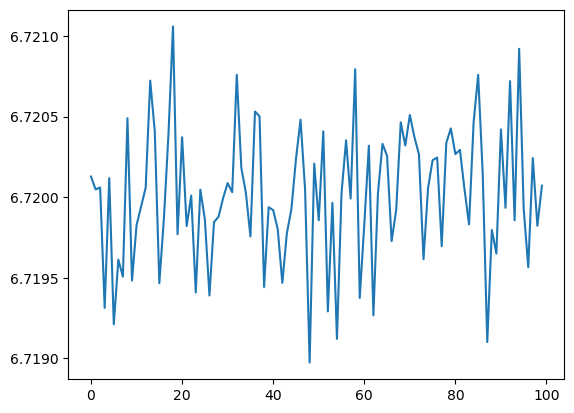

In [218]:
plt.plot(list(range(100)), losses)

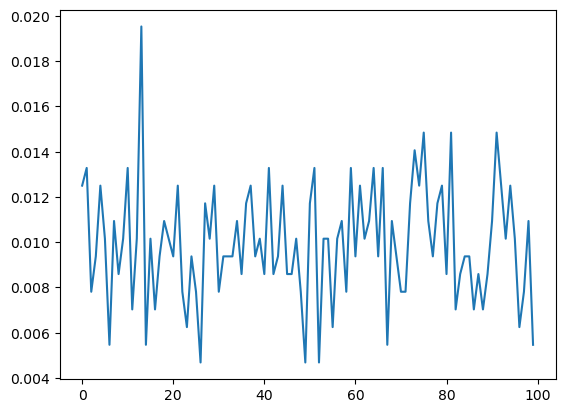

In [219]:
plt.plot(list(range(100)), accuracies)

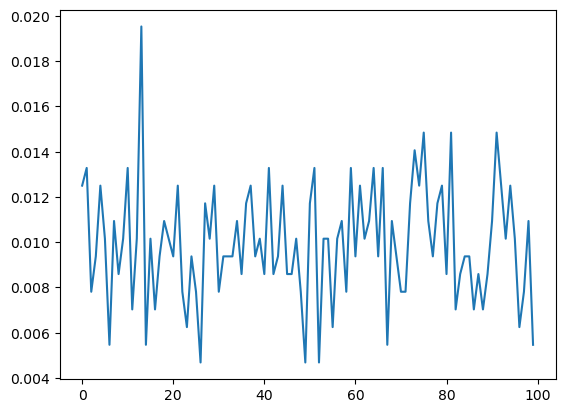

In [220]:
plt.plot(list(range(100)), precisions)

In [163]:
y_batch.argmax(dim=1).shape

torch.Size([128])

In [162]:
predictions.argmax(dim=2).shape

torch.Size([128, 87])

In [165]:
predictions.argmax(dim=2).argmax(dim=1)

tensor([ 0,  0, 15,  0,  0,  0,  1,  0, 17,  0,  0,  0,  0,  6,  0,  0,  0,  0,
         0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  0, 47,  0, 17,  0,  0, 19,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  1,  0,  0,  0,  1, 33,  0,  0,  0,  0,  0,  2,  0,  0,  0,
         0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         1,  0,  0,  1,  0,  0,  0,  0,  3,  0,  1,  0,  0,  0,  0,  0,  1,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,
         0,  0])

In [126]:
losses = []
accuracies = []
precisions = []
recalls = []
n_epochs = 10
for epoch in range(n_epochs):
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        predictions = model(X_batch)
        loss = criterion(predictions, y_batch.type(torch.long))
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        epoch_loss += loss.item()
    with torch.no_grad():
        val_loss, val_acc, val_prec, val_rec = 0, 0, 0, 0
        for X_batch, y_batch in test_loader:
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch.type(torch.long)).item()
            acc = accuracy_score(y_batch, predictions.argmax(dim=1).cpu().detach()).item()
            prec = precision_score(y_batch, predictions.argmax(dim=1).cpu().detach(), average='micro')
            rec = recall_score(y_batch, predictions.argmax(dim=1).cpu().detach(), average='micro')
            val_loss += loss
            val_acc += acc
            val_prec += prec
            val_rec += rec
        precisions.append(val_prec/10)
        losses.append(val_loss/10)
        accuracies.append(val_acc/10)
        recalls.append(val_rec/10)

In [192]:
[i for i in test_loader2d][0][0].shape

torch.Size([128, 349])

In [193]:
[i for i in test_loader2d][0][1].shape

torch.Size([128, 159])

In [149]:
import torchmetrics


In [148]:
precisions

[0.00625]

In [149]:
accuracies

[0.00625]

In [122]:
emb(y_batch.argmax(dim=1))

tensor([[-0.7924,  0.1226, -2.3160,  ..., -0.7485, -0.3477, -2.0962],
        [ 0.4443, -2.0276, -0.7291,  ..., -0.1804,  0.2775, -2.0682],
        [-0.6274,  0.9253, -0.1979,  ...,  1.2351, -1.2784,  0.1833],
        ...,
        [ 1.4833,  1.3271, -1.2878,  ...,  0.2407, -0.2368,  3.5055],
        [ 0.4443, -2.0276, -0.7291,  ..., -0.1804,  0.2775, -2.0682],
        [-0.4212,  0.7348,  1.1873,  ..., -0.5118, -0.9118,  0.6511]],
       grad_fn=<EmbeddingBackward0>)

In [152]:
y_batch.shape

torch.Size([128, 159])

In [178]:
with torch.no_grad():
    print(model2d(X_batch))

tensor([[[ 6.7486e+01,  7.6313e+01,  6.9373e+01,  ...,  7.5993e+01,
           7.6459e+01,  7.6547e+01],
         [-5.1877e-02, -8.4745e-02, -8.1137e-02,  ..., -1.2025e-01,
          -7.9653e-02, -8.8851e-02],
         [-5.1877e-02, -8.4745e-02, -8.1137e-02,  ..., -1.2025e-01,
          -7.9653e-02, -8.8851e-02],
         ...,
         [-5.1877e-02, -8.4745e-02, -8.1137e-02,  ..., -1.2025e-01,
          -7.9653e-02, -8.8851e-02],
         [-5.1877e-02, -8.4745e-02, -8.1137e-02,  ..., -1.2025e-01,
          -7.9653e-02, -8.8851e-02],
         [-5.1877e-02, -8.4745e-02, -8.1137e-02,  ..., -1.2025e-01,
          -7.9653e-02, -8.8851e-02]],

        [[ 3.7664e+01,  4.1408e+01,  3.5778e+01,  ...,  4.2207e+01,
           3.9480e+01,  4.3109e+01],
         [-5.1877e-02, -8.4745e-02, -8.1137e-02,  ..., -1.2025e-01,
          -7.9653e-02, -8.8851e-02],
         [-5.1877e-02, -8.4745e-02, -8.1137e-02,  ..., -1.2025e-01,
          -7.9653e-02, -8.8851e-02],
         ...,
         [-5.1877e-02, -8

In [159]:
predictions.softmax(dim=1).shape

torch.Size([128, 87, 159])

In [175]:
predictions[0].argmax(dim=0)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [139]:
for i in y_batch.argmax(dim=1):
    print(i)

tensor(50)
tensor(127)
tensor(69)
tensor(50)
tensor(127)
tensor(81)
tensor(104)
tensor(50)
tensor(9)
tensor(121)
tensor(127)
tensor(25)
tensor(33)
tensor(80)
tensor(113)
tensor(69)
tensor(127)
tensor(46)
tensor(68)
tensor(127)
tensor(129)
tensor(43)
tensor(50)
tensor(127)
tensor(43)
tensor(47)
tensor(127)
tensor(69)
tensor(4)
tensor(100)
tensor(50)
tensor(127)
tensor(69)
tensor(50)
tensor(50)
tensor(127)
tensor(107)
tensor(113)
tensor(69)
tensor(127)
tensor(127)
tensor(127)
tensor(50)
tensor(127)
tensor(50)
tensor(100)
tensor(50)
tensor(54)
tensor(69)
tensor(10)
tensor(50)
tensor(50)
tensor(113)
tensor(86)
tensor(50)
tensor(127)
tensor(40)
tensor(43)
tensor(43)
tensor(31)
tensor(24)
tensor(38)
tensor(50)
tensor(50)
tensor(65)
tensor(127)
tensor(127)
tensor(50)
tensor(127)
tensor(101)
tensor(119)
tensor(117)
tensor(89)
tensor(4)
tensor(50)
tensor(127)
tensor(127)
tensor(127)
tensor(127)
tensor(127)
tensor(100)
tensor(50)
tensor(21)
tensor(127)
tensor(129)
tensor(127)
tensor(50)
tensor(1

In [160]:
for i in predictions.argmax(dim=1):
    print(i)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

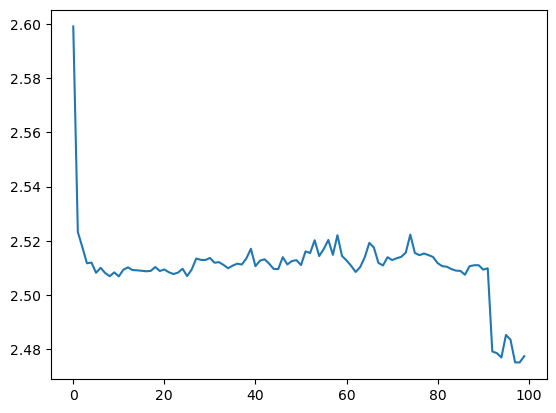

In [88]:
plt.plot(list(range(100)), losses)

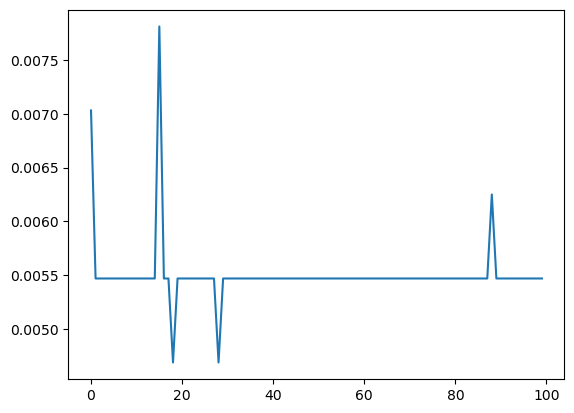

In [89]:
plt.plot(list(range(100)), accuracies)

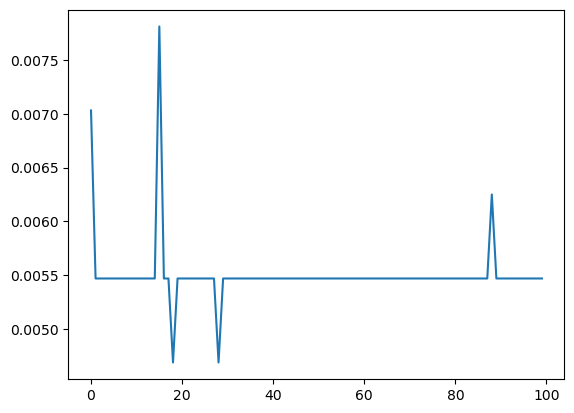

In [90]:
plt.plot(list(range(100)), recalls)

In [91]:
loss

2.4716475009918213